In [8]:
import pandas as pd
from fastai.vision import * 
import torch 
from fastai.metrics import error_rate
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import time 
import os
import matplotlib.pyplot as plt
from fastai.imports import *
import shutil
from fastai.vision.data import ImageDataLoaders
from fastai.vision.all import *

In [10]:
plt.style.use('seaborn-whitegrid')
path = Path('/Users/apple/PycharmProjects/image_classifier/train')

In [11]:
labels = pd.read_csv('/Users/apple/PycharmProjects/image_classifier/labels.csv')

In [12]:
breeds_classifier = ['beagle','chihuahua','doberman','french_bulldog','golden_retriever','malamute','pug','saint_bernard','scottish_deerhound','tibetan_mastiff']


In [13]:
labels =labels[labels.breed.isin(breeds_classifier) ]

In [14]:
labels.id = labels.id + '.jpg'

In [15]:
item_tfms = [Resize(224,method='crop')]

In [16]:
batch_tfms = [*aug_transforms(size=256),Normalize.from_stats(*imagenet_stats)]

In [26]:
data = ImageDataLoaders.from_df(labels,path=path,valid_pct=0.25,fn_col=0,label_col=1,item_tfms=item_tfms,batch_tfms=batch_tfms,bs=64,num_workers=0)

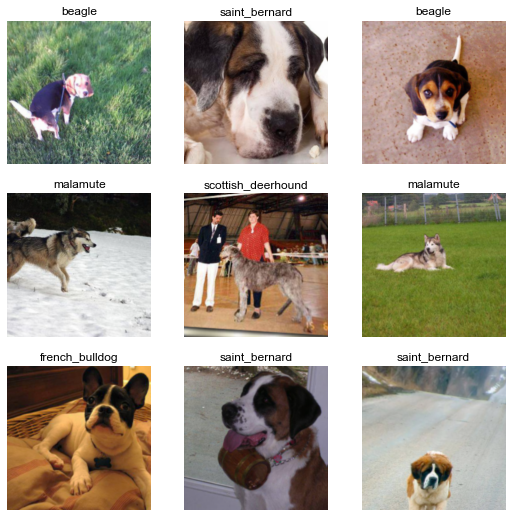

In [21]:
data.show_batch()

In [27]:
learn = cnn_learner(data,resnet50,metrics=accuracy)

In [30]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.631121,0.066100,0.976190,19:29


epoch,train_loss,valid_loss,accuracy,time
0,0.107740,0.030254,0.995238,15:14
1,0.077308,0.067521,0.961905,16:59
2,0.060157,0.057750,0.976190,13:59


In [31]:
interp = ClassificationInterpretation.from_learner(learn)

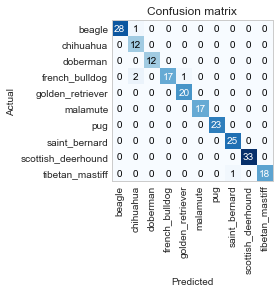

In [32]:
interp.plot_confusion_matrix()